#NEURAL NETWORK 
NOTE: All models here use L2 regularisation with penalty = 0.0001.
First, we set up the libraries.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 

%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/cynthiacheng1/ShroomAnalysis/main/mushrooms.csv")

In [ ]:
#Load the data / Preprocessing

#Features
data = df.drop("class",axis=1)
filters = ["gill-attachment","veil-type","veil-color","ring-number"] #features to be excluded, found through constant and quasi-constant filtering
data = data.drop(columns=filters)
print(data.head)

def to_digit(i):
    if i in chars:
        return chars[i]
    else:
        chars[i] = len(chars)+1
        return chars[i]

features = list(data.columns)
for idx in features:
    chars = {}
    data[idx] = data[idx].map(to_digit)

print(data.head)

#Target
target = df["class"]
target = target.replace("e",0)
target = target.replace("p",1)
print (target.head)


<bound method NDFrame.head of      cap-shape cap-surface cap-color  ... spore-print-color population habitat
0            x           s         n  ...                 k          s       u
1            x           s         y  ...                 n          n       g
2            b           s         w  ...                 n          n       m
3            x           y         w  ...                 k          s       u
4            x           s         g  ...                 n          a       g
...        ...         ...       ...  ...               ...        ...     ...
8119         k           s         n  ...                 b          c       l
8120         x           s         n  ...                 b          v       l
8121         f           s         n  ...                 b          c       l
8122         k           y         n  ...                 w          v       l
8123         x           s         n  ...                 o          c       l

[8124 rows x 18 colum

# Data Preprocessing

In [ ]:

X= data.to_numpy()
y = target.to_numpy()

#70% train, 30%test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=1)

#scaling x 
scaler = preprocessing.StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Sigmoid activation
We are goin to start with one 20-cell hidden layer, with the stoichastic gradient descent solver.

In [ ]:
sig_nn = MLPClassifier(hidden_layer_sizes=(20,),activation="logistic",solver="adam",shuffle=False,max_iter=1000,random_state=1)
sig_nn.fit(X_train,y_train)

y_pred = sig_nn.predict(X_test)
sig_nn_score = sig_nn.score(X_test,y_test)
y_pred_proba = sig_nn.predict_proba(X_test)


In [ ]:
print(sig_nn_score)
#print("w: ",sig_nn.coefs_)
#print("b: ",sig_nn.intercepts_)

0.9995898277276456


Now we know logistic with 1 20-cell hidden layer works, let's see how low we can lower the cell count while maintaining high acc.

In [ ]:
for cell in range (1,21):
    sig_nn = MLPClassifier(hidden_layer_sizes=(cell,),activation="logistic",solver="adam",max_iter=1000,shuffle=False,random_state=1)
    sig_nn.fit(X_train,y_train)

    print(cell,"cells, acc=",sig_nn.score(X_test,y_test))

1 cells, acc= 0.9835931091058244
2 cells, acc= 0.994667760459393
3 cells, acc= 0.9950779327317474
4 cells, acc= 0.9950779327317474
5 cells, acc= 0.9938474159146842
6 cells, acc= 1.0
7 cells, acc= 1.0
8 cells, acc= 0.9995898277276456
9 cells, acc= 0.9995898277276456
10 cells, acc= 1.0
11 cells, acc= 1.0
12 cells, acc= 0.9995898277276456
13 cells, acc= 1.0
14 cells, acc= 0.9991796554552912
15 cells, acc= 1.0
16 cells, acc= 0.9995898277276456
17 cells, acc= 0.9995898277276456
18 cells, acc= 1.0
19 cells, acc= 1.0
20 cells, acc= 0.9995898277276456


Just 6 cells work!

In [ ]:
sig_nn = MLPClassifier(hidden_layer_sizes=(6,),activation="logistic",solver="adam",max_iter=1000,shuffle=False,random_state=1)
sig_nn.fit(X_train,y_train)

y_pred = sig_nn.predict(X_test)
sig_nn_score = sig_nn.score(X_test,y_test)
y_pred_proba = sig_nn.predict_proba(X_test)

print(sig_nn_score)
#print("w: ",sig_nn.coefs_)
#print("b: ",sig_nn.intercepts_)

1.0


# TanH Activation

Same thing, we start with one 20-node layer.

In [ ]:
tanh_nn = MLPClassifier(hidden_layer_sizes=(20,),activation="tanh",solver="adam",max_iter=1000,shuffle=False,random_state=1)
tanh_nn.fit(X_train,y_train)

y_pred = tanh_nn.predict(X_test)
tanh_score = tanh_nn.score(X_test,y_test)
y_pred_proba = tanh_nn.predict_proba(X_test)


In [ ]:
print(tanh_score)
#print("w: ",tanh_nn.coefs_)
#print("b: ",tanh_nn.intercepts_)

0.9995898277276456


TanH also works as we imagined, now let's see if we can lower that cell count.

In [ ]:
for cell in range (1,21):
    #we use lbfgs because the stoichastic one does not converge before cell size 20
    tanh_nn = MLPClassifier(hidden_layer_sizes=(cell,),activation="tanh",solver="adam",max_iter=1000,shuffle=False,random_state=1)
    tanh_nn.fit(X_train,y_train)

    print(cell,"cells, acc=",tanh_nn.score(X_test,y_test))

1 cells, acc= 0.9716981132075472
2 cells, acc= 0.9983593109105825
3 cells, acc= 1.0
4 cells, acc= 0.9942575881870386
5 cells, acc= 0.9991796554552912
6 cells, acc= 1.0
7 cells, acc= 1.0
8 cells, acc= 1.0
9 cells, acc= 1.0
10 cells, acc= 1.0
11 cells, acc= 1.0
12 cells, acc= 1.0
13 cells, acc= 1.0
14 cells, acc= 1.0
15 cells, acc= 1.0
16 cells, acc= 1.0
17 cells, acc= 1.0
18 cells, acc= 1.0
19 cells, acc= 1.0
20 cells, acc= 0.9995898277276456


Same thing here, just 6 cells work!

In [ ]:
tanh_nn = MLPClassifier(hidden_layer_sizes=(6,),activation="tanh",solver="adam",max_iter=1000,shuffle=False,random_state=1)
tanh_nn.fit(X_train,y_train)

y_pred = tanh_nn.predict(X_test)
tanh_nn_score = tanh_nn.score(X_test,y_test)
y_pred_proba = tanh_nn.predict_proba(X_test)

print(tanh_nn_score)
#print("w: ",tanh_nn.coefs_)
#print("b: ",tanh_nn.intercepts_)

1.0


# Finally, the ReLu Activation 

Same as before <3

In [ ]:
relu_nn = MLPClassifier(hidden_layer_sizes=(20,),activation="relu",solver="adam",max_iter=1000,shuffle=False,random_state=1)
relu_nn.fit(X_train,y_train)

y_pred = relu_nn.predict(X_test)
relu_score = relu_nn.score(X_test,y_test)
y_pred_proba = relu_nn.predict_proba(X_test)


In [ ]:
print(relu_score)
#print("w: ",relu_nn.coefs_)
#print("b: ",relu_nn.intercepts_)

1.0


Now we test for least nodes

In [ ]:
for cell in range (1,21):
    #we use lbfgs because the stoichastic one does not converge before cell size 20
    relu_nn = MLPClassifier(hidden_layer_sizes=(cell,),activation="relu",solver="adam",max_iter=1000,shuffle=False,random_state=1)
    relu_nn.fit(X_train,y_train)

    print(cell,"cells, acc=",relu_nn.score(X_test,y_test))

1 cells, acc= 0.9815422477440525
2 cells, acc= 0.9815422477440525
3 cells, acc= 0.9995898277276456
4 cells, acc= 0.9803117309269893
5 cells, acc= 1.0
6 cells, acc= 1.0
7 cells, acc= 1.0
8 cells, acc= 0.9983593109105825
9 cells, acc= 1.0
10 cells, acc= 1.0
11 cells, acc= 1.0
12 cells, acc= 0.9991796554552912
13 cells, acc= 1.0
14 cells, acc= 1.0
15 cells, acc= 1.0
16 cells, acc= 1.0
17 cells, acc= 1.0
18 cells, acc= 0.9995898277276456
19 cells, acc= 0.9995898277276456
20 cells, acc= 1.0


6 nodes work.

Something worth noting is that more nodes does not neccessarily mean a higher accuracy. 

In [ ]:
relu_nn = MLPClassifier(hidden_layer_sizes=(5,),activation="relu",solver="adam",max_iter=1000,shuffle=False,random_state=1)
relu_nn.fit(X_train,y_train)

y_pred = relu_nn.predict(X_test)
relu_nn_score = relu_nn.score(X_test,y_test)
y_pred_proba = relu_nn.predict_proba(X_test)

print(relu_nn_score)
#print("w: ",relu_nn.coefs_)
#print("b: ",relu_nn.intercepts_)

1.0


# Feature Importance Estimation & Feature Reduction
Since our data is linearly seperable, there is not much we can do in terms of optimisation. So instead, let's see if there is any way we can figure out which input features are the most important and which features are least important in determining the output of the model. 

Our first, very naive approach will be to use one hidden layer with one node, this way we can get a very clear view of how much each input node contributes.

In [ ]:
one_nn = MLPClassifier(hidden_layer_sizes=(1,),activation="logistic",solver='adam',max_iter=1000,shuffle=False,random_state=1)
#using logistic because it has highest avg mean at one node, p ~ 98.36

In [ ]:
one_nn.fit(X_train,y_train)

y_pred = one_nn.predict(X_test)
one_nn_score = one_nn.score(X_test,y_test)
y_pred_proba = one_nn.predict_proba(X_test)

print(one_nn_score)
#print("w: ",one_nn.coefs_)
#print("b: ",one_nn.intercepts_)


0.9835931091058244


In [ ]:
feature_count_to_reduce_to = 18

weights = one_nn.coefs_[0]
temp = np.arange(weights.shape[0])
temp = temp.reshape((weights.shape[0],1))

weights_binded = np.hstack((weights,temp)) #next to each weight, is the feature number


weights_abs_sorted = sorted(weights_binded,key=lambda row: np.abs(row[0])) #now weights are sorted by their abs valuem, with their original feature number next to them
result = (np.array(weights_abs_sorted))
feature_names = (data.columns)

print(result)

accepted_filter = []
for ind in range (feature_count_to_reduce_to):
    temp = feature_names[int(result[-ind-1][1])]
    print(temp)
    accepted_filter.append(temp)

print(result[:,0][-1::-1])


[[-1.36308884e-02  1.00000000e+00]
 [ 1.38500349e-02  2.00000000e+00]
 [-1.53860837e-01  1.60000000e+01]
 [-1.86675163e-01  0.00000000e+00]
 [-2.35572669e-01  7.00000000e+00]
 [-3.18277432e-01  1.20000000e+01]
 [-5.14933439e-01  1.00000000e+01]
 [ 8.29235933e-01  8.00000000e+00]
 [ 1.03857821e+00  3.00000000e+00]
 [-1.40807256e+00  1.10000000e+01]
 [ 1.50913558e+00  1.30000000e+01]
 [-1.80742048e+00  1.40000000e+01]
 [-2.05756897e+00  1.50000000e+01]
 [ 2.19577682e+00  9.00000000e+00]
 [ 2.21025935e+00  5.00000000e+00]
 [ 2.47286575e+00  1.70000000e+01]
 [-4.49372073e+00  4.00000000e+00]
 [ 5.01197508e+00  6.00000000e+00]]
gill-size
odor
habitat
gill-spacing
stalk-root
spore-print-color
ring-type
stalk-color-below-ring
stalk-surface-below-ring
bruises
stalk-shape
stalk-surface-above-ring
stalk-color-above-ring
gill-color
cap-shape
population
cap-color
cap-surface
[ 5.01197508 -4.49372073  2.47286575  2.21025935  2.19577682 -2.05756897
 -1.80742048  1.50913558 -1.40807256  1.03857821  0

Let's put these results a nicely labeled graph and see for ourselves. 

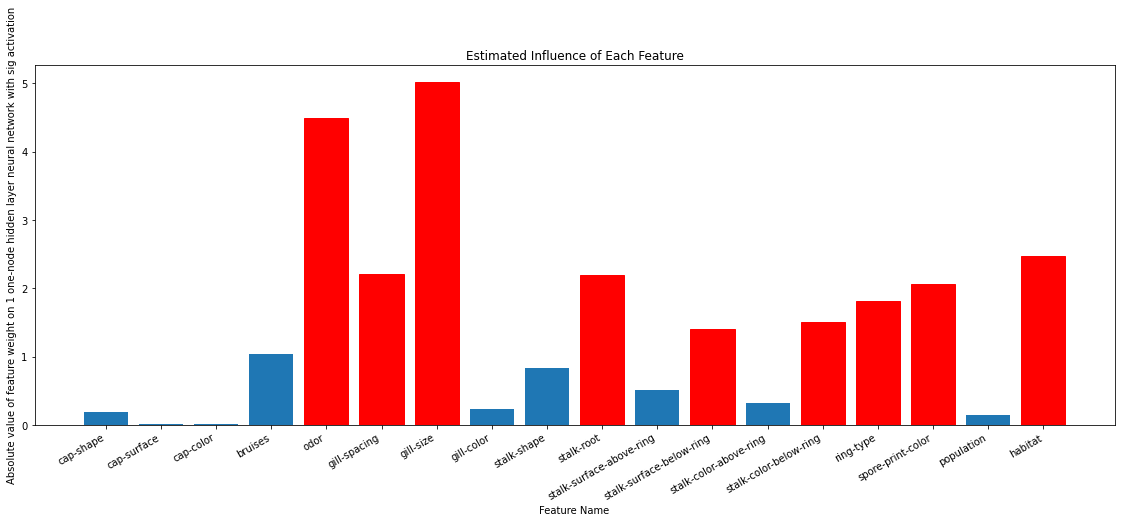

In [ ]:
unsorted_x = feature_names
unsorted_y = np.abs(weights.reshape(weights.shape[0]))

plt.rcParams["figure.figsize"] = (15, 5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unsorted_x,unsorted_y)
for index in range(feature_count_to_reduce_to):
    ax.get_children()[int(result[-index-1][1])].set_color('r')

plt.title("Estimated Influence of Each Feature")
plt.xlabel('Feature Name')
plt.ylabel('Absolute value of feature weight on 1 one-node hidden layer neural network with sig activation')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

Now, we see that the top 9 influential weights. Let's see if we are able to use just these 9 features to construct a good enough model. 

In [ ]:
X_new = data[accepted_filter].to_numpy()

#70% train, 30%test
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y,test_size=0.30,random_state=1)

#scaling x 
scaler = preprocessing.StandardScaler()
X_new_train= scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)

In [ ]:
for cell in range (1,21):
    tanh_nn = MLPClassifier(hidden_layer_sizes=(cell,),activation="logistic",solver='adam',max_iter=1000,shuffle=False,random_state=1)
    tanh_nn.fit(X_new_train,y_new_train)

    print(cell,"cells, acc=",tanh_nn.score(X_new_test,y_new_test))

1 cells, acc= 0.9815422477440525
2 cells, acc= 0.9803117309269893
3 cells, acc= 0.9803117309269893
4 cells, acc= 0.9815422477440525
5 cells, acc= 0.9815422477440525
6 cells, acc= 0.9815422477440525
7 cells, acc= 0.9864643150123051
8 cells, acc= 0.9864643150123051
9 cells, acc= 0.9864643150123051
10 cells, acc= 0.9864643150123051
11 cells, acc= 0.9864643150123051
12 cells, acc= 0.9864643150123051
13 cells, acc= 1.0
14 cells, acc= 1.0
15 cells, acc= 1.0
16 cells, acc= 1.0
17 cells, acc= 1.0
18 cells, acc= 1.0
19 cells, acc= 1.0
20 cells, acc= 1.0


It seems that we were able to cut down the number of features in half to the following 9. 

In [ ]:
print(accepted_filter)

['gill-size', 'odor', 'habitat', 'gill-spacing', 'stalk-root', 'spore-print-color', 'ring-type', 'stalk-color-below-ring', 'stalk-surface-below-ring']


In [ ]:
X_new = data[accepted_filter].to_numpy()

#70% train, 30%test
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y,test_size=0.30,random_state=1)

#scaling x 
scaler = preprocessing.StandardScaler()
X_new_train= scaler.fit_transform(X_new_train)
X_new_test = scaler.transform(X_new_test)


nn = MLPClassifier(hidden_layer_sizes = (20,),activation="logistic",solver="adam",max_iter=1000,shuffle=False,random_state=1)
nn.fit(X_new_train,y_new_train)

y_pred = nn.predict(X_new_test)
nn_score = nn.score(X_new_test,y_new_test)
y_pred_proba = nn.predict_proba(X_new_test)

print(nn_score)
print("w: ",one_nn.coefs_)
print("b: ",one_nn.intercepts_)

1.0
w:  [array([[-0.18667516],
       [-0.01363089],
       [ 0.01385003],
       [ 1.03857821],
       [-4.49372073],
       [ 2.21025935],
       [ 5.01197508],
       [-0.23557267],
       [ 0.82923593],
       [ 2.19577682],
       [-0.51493344],
       [-1.40807256],
       [-0.31827743],
       [ 1.50913558],
       [-1.80742048],
       [-2.05756897],
       [-0.15386084],
       [ 2.47286575]]), array([[-7.71019424]])]
b:  [array([-1.99983543]), array([2.98553602])]


We know 9 feautres work, let's see what's the minimum amount of features neeeded to have a nice model. (using 20 nodes)

Note: We are choosing in order of the estimated influence on output from biggest influence to lowest influence. The specific order is illustrated on the table of the write-up / presentation. 

In [ ]:
def feature_acceptance(number):
    accepted_filter = []

    for ind in range (number):
        temp = feature_names[int(result[-ind-1][1])]
        #print(temp)
        accepted_filter.append(temp)

    X_new = data[accepted_filter].to_numpy()

    #70% train, 30%test
    X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y,test_size=0.30,random_state=1)

    #scaling x 
    scaler = preprocessing.StandardScaler()
    X_new_train= scaler.fit_transform(X_new_train)
    X_new_test = scaler.transform(X_new_test)

    nn = MLPClassifier(hidden_layer_sizes = (20,),activation="logistic",solver="adam",max_iter=1000,shuffle=False,random_state=1)
    nn.fit(X_new_train,y_new_train)

    train_score = nn.score(X_new_train,y_new_train)
    test_score = nn.score(X_new_test,y_new_test)

    print(number,"feature")
    return (train_score,test_score)\


train_list =[]
test_list = []
for x in range (1,10):
    train_score, test_score = feature_acceptance(x)
    train_list.append(train_score)
    test_list.append(test_score)

print(train_list)
print(test_list)







1 feature
2 feature
3 feature
4 feature
5 feature
6 feature
7 feature
8 feature
9 feature
[0.7541329581428069, 0.9799507562434049, 0.9868097080548716, 0.9954273654590221, 0.9963067182553641, 0.9875131902919452, 0.9994723883221949, 0.9875131902919452, 1.0]
[0.7612797374897456, 0.977850697292863, 0.9815422477440525, 0.9909762100082035, 0.9922067268252666, 0.9864643150123051, 0.9979491386382281, 0.9864643150123051, 1.0]


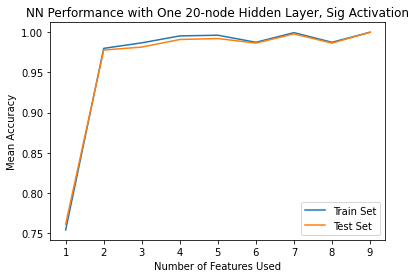

In [ ]:
x = np.arange(1,10)
plt.plot(x,train_list)
plt.plot(x,test_list)
plt.legend(['Train Set',"Test Set"])
plt.xlabel("Number of Features Used")
plt.ylabel("Mean Accuracy")
plt.title("NN Performance with One 20-node Hidden Layer, Sig Activation")
plt.show()